**Miniprojekt**

Problem: Rozpoznawanie koni i zebr na obrazach

Framework: Keras

Autor: Mateusz Domalążek

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import os
import numpy as np
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import plot_model

from tensorflow.keras import metrics
from tensorflow.keras import losses

import matplotlib.pyplot as plt



In [ ]:
batch_size = 128
num_classes = 2
epochs = 20
x_size = 64
y_size = 64

In [ ]:
def load_images_from_folders(folder1, folder2):
    images = []
    images_labels = []
    for filename in os.listdir(folder1):
        img = cv2.imread(os.path.join(folder1,filename),0)
        img_re = cv2.resize(img, (x_size,y_size), interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img_re)
            images_labels.append(0)
    for filename in os.listdir(folder2):
        img = cv2.imread(os.path.join(folder2,filename),0)
        img_re = cv2.resize(img, (x_size,y_size), interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img_re)
            images_labels.append(1)
    return np.array(images), np.array(images_labels)

def load_color_images_from_folders(folder1, folder2):
    images = []
    images_labels = []
    for filename in os.listdir(folder1):
        img = cv2.imread(os.path.join(folder1,filename))
        img_re = cv2.resize(img, (x_size,y_size), interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img_re)
            images_labels.append(0)
    for filename in os.listdir(folder2):
        img = cv2.imread(os.path.join(folder2,filename))
        img_re = cv2.resize(img, (x_size,y_size), interpolation = cv2.INTER_AREA)
        if img is not None:
            images.append(img_re)
            images_labels.append(1)
    return np.array(images), np.array(images_labels)

In [ ]:
IN_x_test, IN_y_test = load_images_from_folders('/content/drive/MyDrive/Colab/testA','/content/drive/MyDrive/Colab/testB')
IN_x_train, IN_y_train = load_images_from_folders('/content/drive/MyDrive/Colab/trainA','/content/drive/MyDrive/Colab/trainB')

C_IN_x_test, C_IN_y_test = load_color_images_from_folders('/content/drive/MyDrive/Colab/testA','/content/drive/MyDrive/Colab/testB')
C_IN_x_train, C_IN_y_train = load_color_images_from_folders('/content/drive/MyDrive/Colab/trainA','/content/drive/MyDrive/Colab/trainB')

Przykładowe zdjęcie testowe (konie)

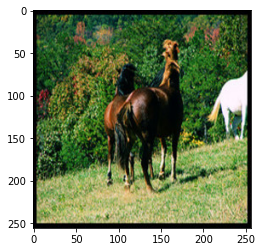

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab/testA/n02381460_1000.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Przykładowe zdjęcie testowe (zebry)

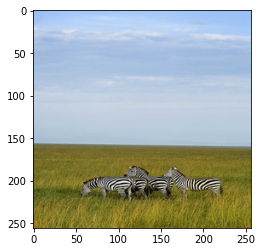

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab/testB/n02391049_100.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
#Zaladowanie powyzej przygotowanych danych do zbiorow
(x_train, y_train), (x_test, y_test) = (IN_x_train, IN_y_train), (IN_x_test, IN_y_test)

x_train = x_train.reshape((x_train.shape[0], x_size, y_size, 1))
x_test = x_test.reshape((x_test.shape[0], x_size, y_size, 1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


##Normalizacja danych do wartosci z przedzialu [0;1]
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape)

##One-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

2401 train samples
260 test samples
(2401, 64, 64, 1)


In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(128, (3,3), input_shape=(x_size, y_size, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2)) 
#Dwie mozliwe wartosci na wyjsciu
model.add(Activation('softmax'))


#Stosujemy Cross-Entropy dla binarnego problemu klasyfikacji
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(),
              metrics=['categorical_accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 128)       1280      
                                                                 
 activation_8 (Activation)   (None, 62, 62, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 128)       147584    
                                                                 
 activation_9 (Activation)   (None, 29, 29, 128)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                  

In [ ]:
#Trenujemy model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
19/19 [==============================] - 43s 2s/step - loss: 0.7093 - categorical_accuracy: 0.5727 - val_loss: 0.5740 - val_categorical_accuracy: 0.7808
Epoch 2/20
19/19 [==============================] - 43s 2s/step - loss: 0.5347 - categorical_accuracy: 0.7251 - val_loss: 0.4605 - val_categorical_accuracy: 0.8038
Epoch 3/20
19/19 [==============================] - 42s 2s/step - loss: 0.4253 - categorical_accuracy: 0.7913 - val_loss: 0.3572 - val_categorical_accuracy: 0.8462
Epoch 4/20
19/19 [==============================] - 42s 2s/step - loss: 0.3941 - categorical_accuracy: 0.8059 - val_loss: 0.3987 - val_categorical_accuracy: 0.8115
Epoch 5/20
19/19 [==============================] - 42s 2s/step - loss: 0.3829 - categorical_accuracy: 0.8147 - val_loss: 0.2798 - val_categorical_accuracy: 0.8769
Epoch 6/20
19/19 [==============================] - 42s 2s/step - loss: 0.3311 - categorical_accuracy: 0.8476 - val_loss: 0.3091 - val_categorical_accuracy: 0.8500
Epoch 7/20
19/19

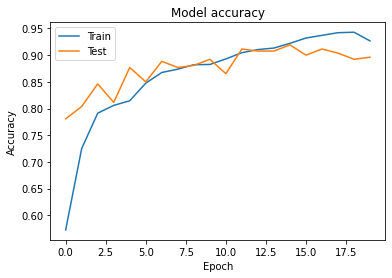

In [ ]:
#Tworzomy wykres dokladnosci modelu
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

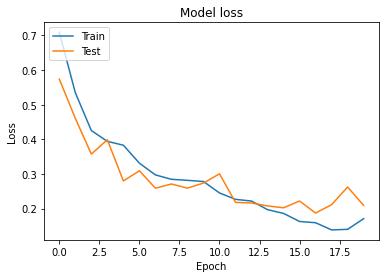

In [ ]:
#Tworzymy wykres straty modelu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Zaprojektowany model bardzo dobrze potrafi rozróżnić zdjęcia koni od zebr. Dodatkowym utrudnieniem zastosowanym przy tym uczeniu było analizowanie zdjęć w odcieniach szarości. Przygotowany zbiór został przetworzony w taki sposób, aby zdjęcia były mniejsze niż oryginalne i finalnie osiągnęły rozmiar 64x64 piksele. Po nauczeniu modelu z zastosowaniem 20 epok i batch size równym 128 osiągnęliśmy dokładność na zbiorze testowym prawie 90%.

